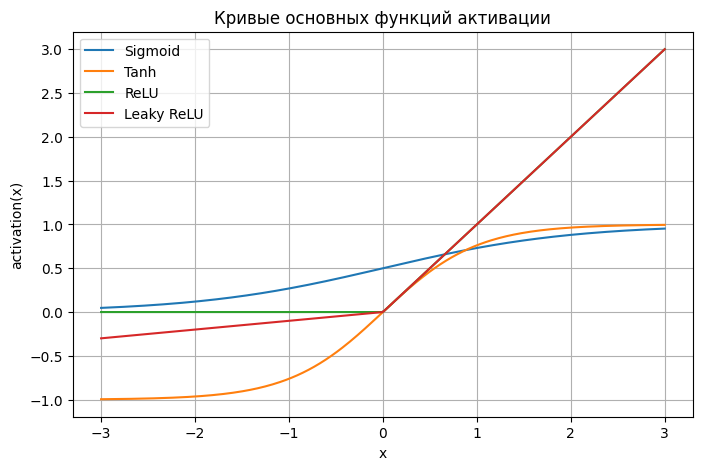

In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

from func_activation import (
    relu,
    sigmoid,
    tanh,
    leaky_relu
)
# 1) Входные данные
x = np.linspace(-3, 3, 300)


# 3) Вычисление значений
y_sig = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky = leaky_relu(x, 0.1)

# 4) Визуализация (оставьте без изменений)
plt.figure(figsize=(8, 5))
plt.plot(x, y_sig, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_leaky, label='Leaky ReLU')
plt.title('Кривые основных функций активации')
plt.xlabel('x')
plt.ylabel('activation(x)')
plt.legend()
plt.grid(True)
plt.show()

sigmoid


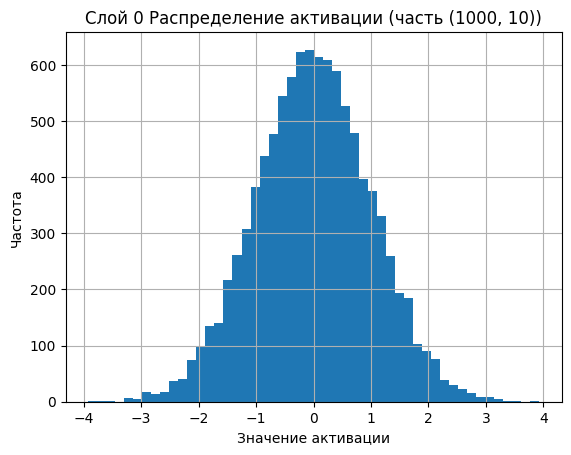

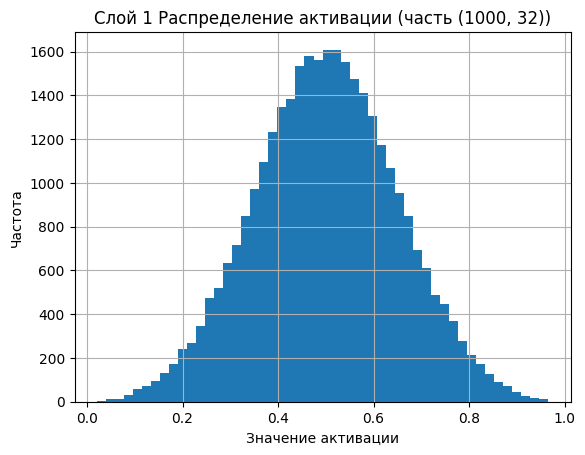

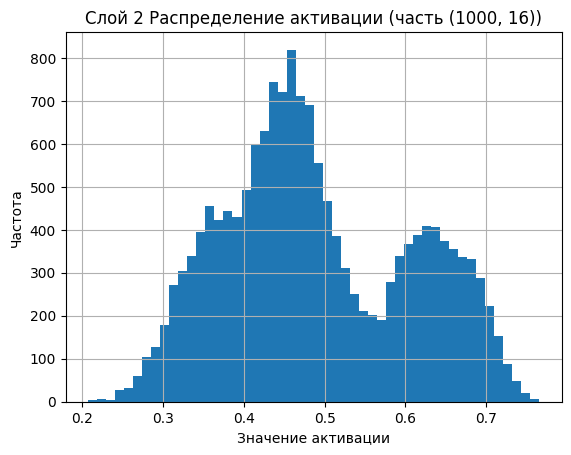

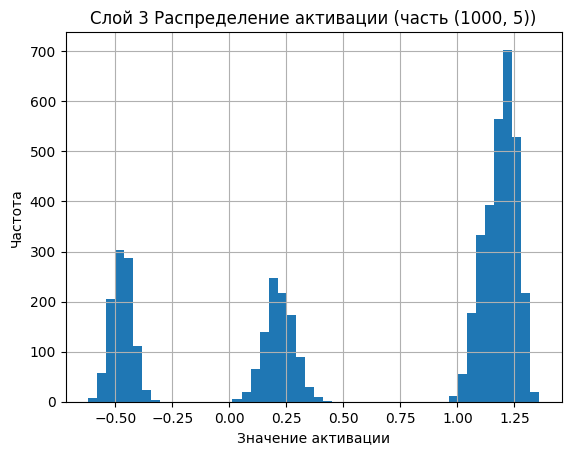

In [2]:
from basic_MLP import MLP

# Инициализируем модель с 4 слоями: 10 входов, 32 нейрон, 16 нейронов и 5 выходов
np.random.seed(42)
model = MLP([10, 32, 16, 5], activation='sigmoid')
X_rand = np.random.randn(1000, 10)

# Соберем активации
acts = model.forward_with_activations(X_rand)
print(model.activation)
# Отобразим активации каждого слоя
for idx, A in enumerate(acts):
    plt.figure()
    plt.hist(A.flatten(), bins=50)
    plt.title(f'Слой {idx} Распределение активации (часть {A.shape})')
    plt.xlabel('Значение активации')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

In [3]:
x = np.array([[1.0, 2.0, -1.0]])
# Запустим три MLP модели с архитектурой 3-2-1 и различными активациями в цикле
for act in ['relu', 'sigmoid', 'tanh']:
    np.random.seed(0)
    model_x = MLP([3,2,1], activation=act)
    y_pred = model_x.forward(x)
    print(f"{act}: y_pred={y_pred.ravel()[0]:.4f}, "
          f"len(Z_list)={len(model_x.Z_list)}, len(A_list)={len(model_x.A_list)}")

    # Отобразим значения Z и A
    for i, (Z, A) in enumerate(zip(model_x.Z_list, model_x.A_list)):
        print(f"Layer {i}: Z={Z.ravel()}, A={A.ravel()}")
    print()


relu: y_pred=0.4516, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[1.17255379 3.70569704], A=[ 1.  2. -1.]
Layer 1: Z=[0.45164167], A=[1.17255379 3.70569704]

sigmoid: y_pred=0.4717, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[1.17255379 3.70569704], A=[ 1.  2. -1.]
Layer 1: Z=[0.47174548], A=[0.76360631 0.97600675]

tanh: y_pred=0.5166, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[1.17255379 3.70569704], A=[ 1.  2. -1.]
Layer 1: Z=[0.51662453], A=[0.82508913 0.99879207]



Создадим набор данных, который попробуем аппроксимировать с помощью нейросети MLP

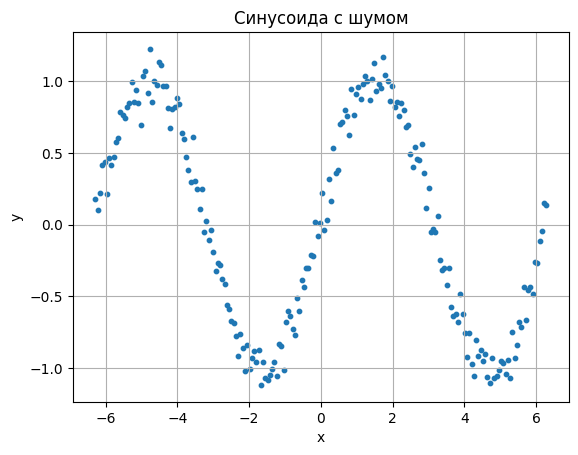

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Any, Union, Sequence
from numpy.typing import NDArray

from metrics import mse

np.random.seed(0)
X: NDArray[np.float64] = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]  # (200,1)
y: NDArray[np.float64] = np.sin(X) + 0.1*np.random.randn(*X.shape)     # шумные данные

plt.scatter(X, y, s=10)
plt.title("Синусоида с шумом")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.show()

In [5]:
lr: np.float64 = np.float64(0.01)
epochs: int = 300
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []

model = MLP([1, 30, 1], activation='tanh')

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % 50 == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

TypeError: iteration over a 0-d array

Попробуем обучить модель с другими параметрами для решения той же задачи:

Epoch 200, loss=0.4454
Epoch 400, loss=0.1040
Epoch 600, loss=0.0798
Epoch 800, loss=0.0658
Epoch 1000, loss=0.0777
Epoch 1200, loss=0.0510
Epoch 1400, loss=0.0453
Epoch 1600, loss=0.0407
Epoch 1800, loss=0.0557
Epoch 2000, loss=0.0173


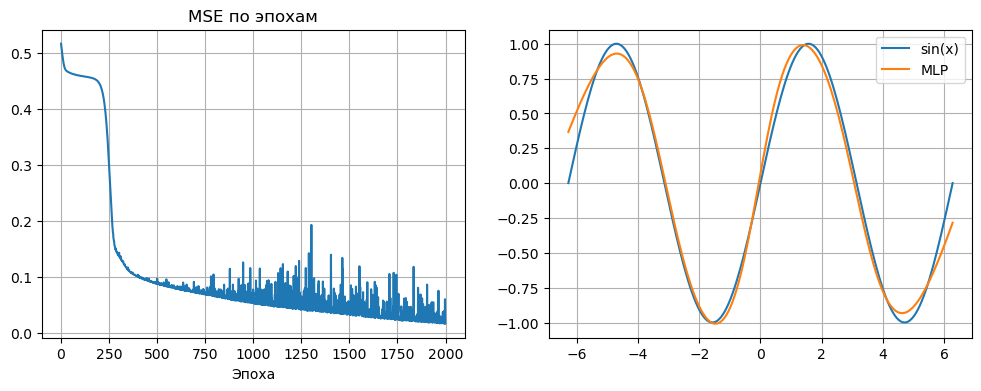

In [ ]:
layer_sizes: Sequence[int] = [1, 30, 25, 10, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 2000
epoch_output: int = 200
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'tanh'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Сейчас, с непривычки, прямо мурашки от обучения. Итак - 8 секунд на моем слабом компьютере, как мы видим loss практически отсутствует, однако аппроксимация не такая близкая, но очень привлекательная, учитывая, что мы используем по сути линейный расчет, возможно, функция tanh не так хорошо двигает ситуацию. Построим обучение и графики для каждого обучения для нескольких функций активации и оценим результат.

Для начала взглянем на исходные данные и кривую аппроксимации

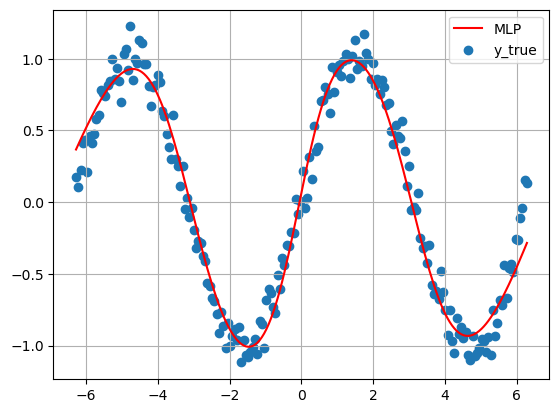

In [ ]:
plt.plot(xx, model.forward(xx), label="MLP", c='r')
plt.scatter(xx, y, label='y_true')
plt.legend(); plt.grid()
plt.show()

Посмотрим на поведение для сигмоиды, как функции активации

Epoch 200, loss=0.5289
Epoch 400, loss=0.5284
Epoch 600, loss=0.5271
Epoch 800, loss=0.5245
Epoch 1000, loss=0.5182
Epoch 1200, loss=0.5003
Epoch 1400, loss=0.4723
Epoch 1600, loss=0.4643
Epoch 1800, loss=0.4615
Epoch 2000, loss=0.4597


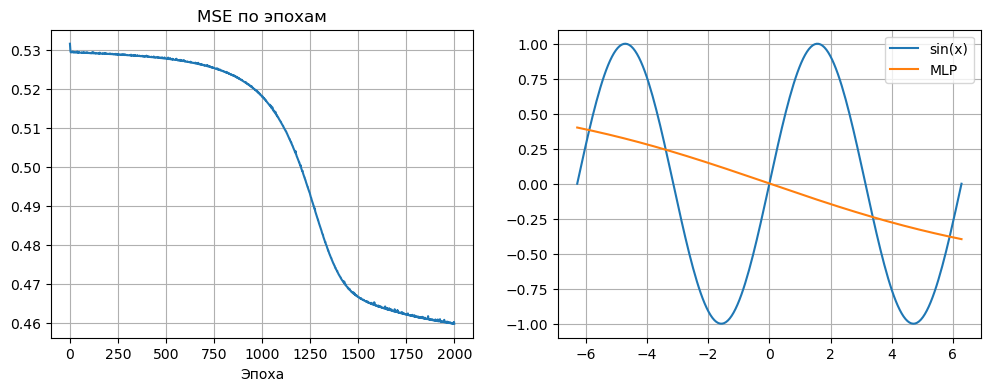

In [ ]:
layer_sizes: Sequence[int] = [1, 30, 25, 10, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 2000
epoch_output: int = 200
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'sigmoid'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Сигмодиа совсем не справилась, или я что-то не то делаю.
Попробую новую функцию активации - синусоиду. Да-да, хитро, но все-же

Epoch 200, loss=0.0095
Epoch 400, loss=0.0095
Epoch 600, loss=0.0095
Epoch 800, loss=0.0095
Epoch 1000, loss=0.0095


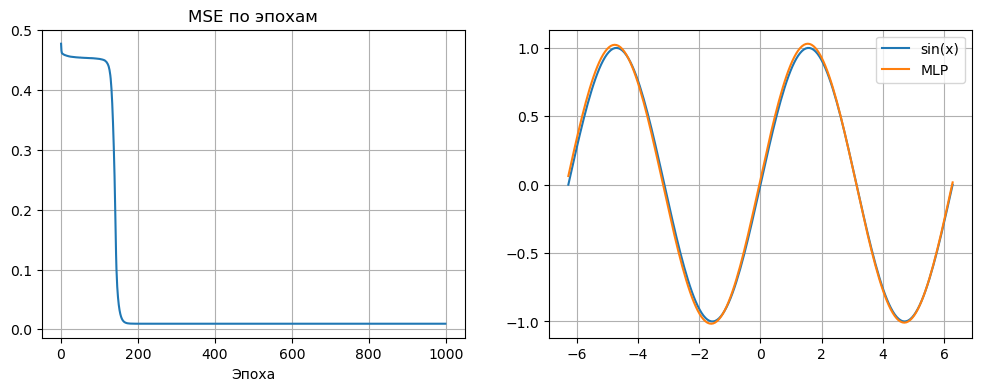

In [ ]:
layer_sizes: Sequence[int] = [1, 20, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 1000
epoch_output: int = 200
batch_size: int = 20
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'sin'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Как видно по графику потерь, вполне достаточно около 200-300 эпох для обучения довольно маленькой модели с 15 нейронами в единственном скрытом слое. Итак. Да-да, понятно, что никогда не будет так, что удасться угадать функцию по которой будет распределена признаковая зависимость и лишь чуткость инженера и умение увидеть аппроксимирующую зависимость, подобрать активационную функцию ключевое в этой задаче. А для этого надо хорошо знать матан.

И да, сейчас мы решаем задачу регрессии. Для неё, мне кажется уже сформировалась универсальная функция для обучения MLP на двумерной зависимости. Надо бы в следующий раз её вывести.

In [ ]:
from MLP_learner_GD import MLP_learner_GD

learner: MLP_learner_GD = MLP_learner_GD(
    model='MLP',
    X = X,
    y = y,
    activation= 'sin',
    layer_sizes=[1, 25, 1],
    epochs=1500,
    epoch_output=150
)

In [ ]:
learner.learn_model(GD_type='batch_GD')

Epoch 150: loss=0.4538, ||grad||=0.0306
Epoch 300: loss=0.4523, ||grad||=0.0366
Epoch 450: loss=0.4481, ||grad||=0.0778
Epoch 600: loss=0.3974, ||grad||=0.3333
Epoch 750: loss=0.0640, ||grad||=0.3058
Epoch 900: loss=0.0139, ||grad||=0.0856
Epoch 1050: loss=0.0098, ||grad||=0.0243
Epoch 1200: loss=0.0095, ||grad||=0.0069
Epoch 1350: loss=0.0095, ||grad||=0.0020
Epoch 1500: loss=0.0095, ||grad||=0.0006


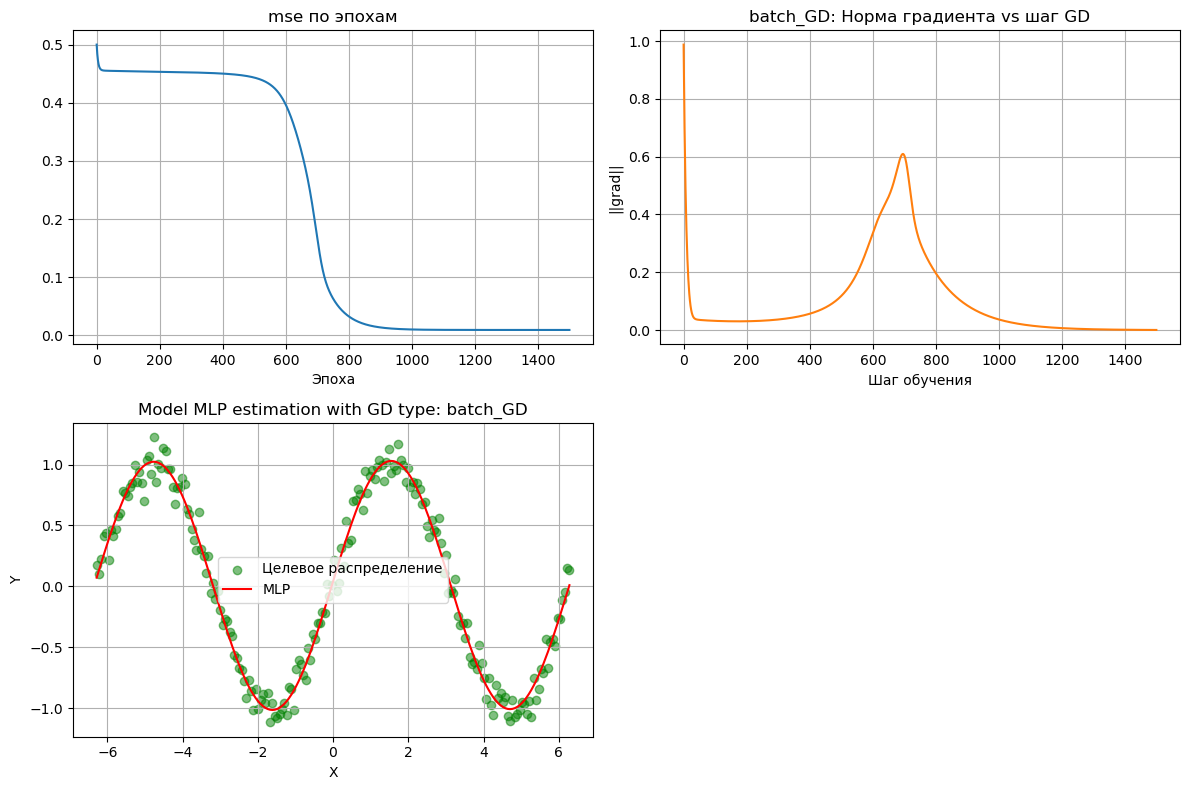

In [ ]:
learner.visualise_learning_process()

## Train and validation curve for MLP

In [ ]:

import numpy as np


# Мало данных — всего 50 точек на отрезке [-2, 2]
np.random.seed(0)
# Задача посложнее — синус с шумом
X = np.linspace(-2, 2, 50)[:, None]
y = X**3 - X + 0.1 * np.random.randn(*X.shape)
perm = np.random.permutation(len(X))
split = int(0.8 * len(X))


# Разделим на тренировочную и валидационную выборки
X_train, y_train = X[perm[:split]], y[perm[:split]]
X_val,   y_val   = X[perm[split:]], y[perm[split:]]

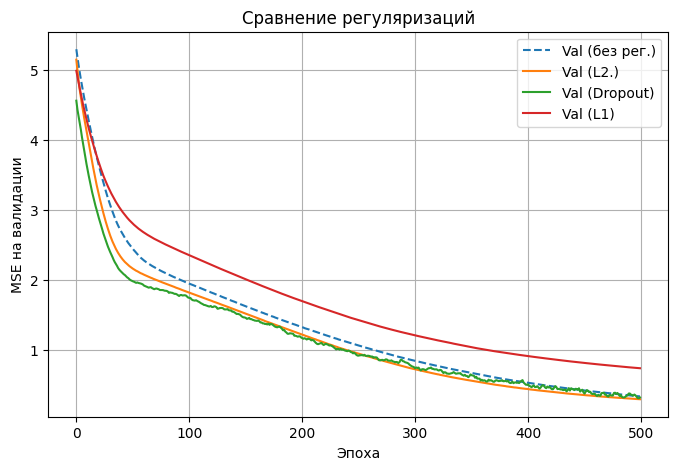

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

class MLP:
    def __init__(self,
                 layer_sizes,
                 activation='relu',
                 lr=0.01,
                 l2=0.0,      # здесь мы будем задавать параметр L2
                 l1=0.0,      # здесь будем задавать параметр L1
                 dropout=0.0  # здесь будем задавать Dropout
                ):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W, self.b = [], []
        self.Z_list, self.A_list = [], []
        self.dW_list, self.db_list = [], []
        self.lr = lr
        self.l2 = l2
        self.l1 = l1
        self.dropout = dropout

        for i in range(len(layer_sizes)-1):
            in_dim, out_dim = layer_sizes[i], layer_sizes[i+1]
            self.W.append(np.random.randn(in_dim, out_dim) * np.sqrt(2/(in_dim + out_dim)))
            self.b.append(np.zeros((1, out_dim)))

        # контейнер для масок Dropout (скрытые слои)
        self.masks = [None] * (len(self.W)-1)

    def _activate(self, Z):
        if self.activation == 'sigmoid':
            return 1/(1+np.exp(-Z))
        elif self.activation == 'relu':
            return np.maximum(0, Z)
        elif self.activation == 'tanh':
            return np.tanh(Z)
        else:
            raise ValueError(self.activation)

    def _dactivate(self, Z):
        if self.activation == 'sigmoid':
            s = 1/(1+np.exp(-Z))
            return s*(1-s)
        elif self.activation == 'relu':
            return (Z > 0).astype(float)
        elif self.activation == 'tanh':
            return 1 - np.tanh(Z)**2
        else:
            raise ValueError(self.activation)

    def forward(self, X, train=True):
        self.Z_list, self.A_list = [], []
        A = X; self.A_list.append(A)
        #     self.Z_list.append(Z)
        # выходной слой (линейный)
        for i in range(len(self.W)):
            Z = A.dot(self.W[i]) + self.b[i]; self.Z_list.append(Z)
            A = self._activate(Z) if i < len(self.W)-1 else Z
            if train and self.dropout > 0 and i < len(self.W)-1:
                mask = (np.random.rand(*A.shape) > self.dropout) / (1 - self.dropout)
                A *= mask
                self.masks[i] = mask
            self.A_list.append(A)
        return A

    def mse(self, y_pred, y_true):
        loss = np.mean((y_pred - y_true)**2)
        loss += (self.l2/2) * sum(np.sum(W*W) for W in self.W)
        # Добавьте L1-регуляризацию
        loss += self.l1 * sum(np.sum(np.abs(W)) for W in self.W)
        return loss
    
    def backward(self, y_true):
        m = y_true.shape[0]
        # Выходной слой (линейный)
        aL, zL = self.A_list[-1], self.Z_list[-1]
        delta = (2*(aL - y_true)/m)

        # Градиенты выхода
        a_prev = self.A_list[-2]
        # Добавьте L1-регуляризацию к градиентам
        dW = a_prev.T.dot(delta) + self.l2 * self.W[-1] + self.l1 * np.sign(self.W[-1])
        db = np.sum(delta, axis=0, keepdims=True)
        self.dW_list, self.db_list = [dW], [db]

        # Скрытые слои (используем производную активации)
        for l in range(len(self.layer_sizes)-2, 0, -1):
            z = self.Z_list[l-1]
            a_prev = self.A_list[l-1]
            W_next = self.W[l]
            delta = delta.dot(W_next.T) * self._dactivate(z)
    
            if self.dropout > 0:
                delta *= self.masks[l-1]
            # Добавьте L1-регуляризацию к градиентам        
            dW = a_prev.T.dot(delta) + self.l2 * self.W[l-1] + self.l1 * np.sign(self.W[l-1])
            db = np.sum(delta, axis=0, keepdims=True)
            self.dW_list.insert(0, dW)
            self.db_list.insert(0, db)

    def update_params(self):
        for i in range(len(self.W)):
            self.W[i] -= self.lr * self.dW_list[i]
            self.b[i] -= self.lr * self.db_list[i]

# Функция обучения и сбора кривых loss
def train_model(model, epochs=500):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        # train
        preds = model.forward(X_train, train=True)
        train_losses.append(model.mse(preds, y_train))
        model.backward(y_train)
        model.update_params()
        # val
        preds_val = model.forward(X_val, train=False)
        val_losses.append(model.mse(preds_val, y_val))
    return train_losses, val_losses

# Пример использования:
m0 = MLP([1,64,64,1], lr=0.01, l2=0.00,    l1=0,    dropout=0.0)  # без регуляризации
m1 = MLP([1,64,64,1], lr=0.01, l2=0.001,    l1=0,    dropout=0.0)  # L2-регуляризация
m2 = MLP([1,64,64,1], lr=0.01, l2=0.00,    l1=0,    dropout=0.1)  # Dropout
m3 = MLP([1,64,64,1], lr=0.01, l2=0.00,    l1=0.001,    dropout=0.0)  # l1

l0, v0 = train_model(m0)
l1, v1 = train_model(m1)
l2, v2 = train_model(m2)
l3, v3 = train_model(m3)



# Построение сравнительных кривых
plt.figure(figsize=(8,5))
plt.plot(v0, '--', label='Val (без рег.)')
plt.plot(v1, label='Val (L2.)')
plt.plot(v2, label='Val (Dropout)')
plt.plot(v3, label='Val (L1)')

plt.xlabel('Эпоха')
plt.ylabel('MSE на валидации')
plt.title('Сравнение регуляризаций')
plt.legend()
plt.grid(True)
plt.show()

Конечно. Давайте детально разберем алгоритм **обратного распространения ошибки (backpropagation)** с математической точки зрения.

Backpropagation — это основной алгоритм обучения искусственных нейронных сетей. Его цель — эффективно вычислить **градиент функции потерь по всем весам сети**, что позволяет затем использовать методы градиентного спуска для минимизации этой функции.

### 1. Общая постановка задачи

Представим себе многослойный перцептрон (Feedforward Neural Network).

*   **Сеть**: Последовательность слоев $ L^{(0)} $ (входной), $ L^{(1)}, L^{(2)}, \dots, L^{(L)} $ (выходной).
*   **Вес**: $ w_{ij}^{(l)} $ — вес связи между $ i $-м нейроном слоя $ l-1 $ и $ j $-м нейроном слоя $ l $.
*   **Смещение**: $ b_j^{(l)} $ — смещение $ j $-го нейрона слоя $ l $.
*   **Выход нейрона**: $ a_j^{(l)} $ — активация (выход) $ j $-го нейрона слоя $ l $.
*   **Суммарный вход**: $ z_j^{(l)} $ — взвешенная сумма входов для $ j $-го нейрона слоя $ l $ до применения функции активации.
*   **Функция активации**: $ \sigma(\cdot) $ (например, сигмоида, гиперболический тангенс, ReLU). Мы предположим, что она дифференцируема.
*   **Функция потерь**: $ J(W, b) $ — функция, которую мы хотим минимизировать (например, среднеквадратичная ошибка, перекрестная энтропия).

Математическая модель прямого прохода (Forward Pass) для одного примера $ x $:

1.  **Входной слой**: $ a^{(0)} = x $.
2.  **Для каждого слоя $ l = 1, 2, \dots, L $**:
    *   $ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $ (здесь $ W^{(l)} $ — матрица весов)
    *   $ a^{(l)} = \sigma(z^{(l)}) $
3.  **Результат**: На выходном слое получаем прогноз $ \hat{y} = a^{(L)} $.
4.  **Ошибка**: Вычисляем функцию потерь $ J $, сравнивая $ \hat{y} $ с истинным значением $ y $.

### 2. Интуиция Backpropagation: Распространение ошибки назад

Цель — найти две ключевые производные для каждого веса и смещения:
$$
\frac{\partial J}{\partial w_{ij}^{(l)}} \quad \text{и} \quad \frac{\partial J}{\partial b_{j}^{(l)}}
$$

Идея backpropagation заключается в использовании **цепного правила дифференцирования (chain rule)**. Ошибка, вычисленная на выходном слое, "распространяется" назад по сети, и на каждом шаге мы вычисляем, насколько каждый нейрон "виноват" в этой общей ошибке.

Введем ключевую величину — **ошибку $ \delta $** для нейрона.

**Определение**: Ошибка $ \delta_j^{(l)} $ для $ j $-го нейрона в слое $ l $ определяется как скорость изменения функции потерь по взвешенной сумме входов этого нейрона:
$$
\delta_j^{(l)} = \frac{\partial J}{\partial z_j^{(l)}}
$$

Эта величина показывает, насколько чувствительна общая ошибка $ J $ к небольшим изменениям в суммарном входе $ z_j^{(l)} $ нейрона.

### 3. Математический вывод уравнений Backpropagation

Мы выведем уравнения шаг за шагом, двигаясь от выходного слоя ко входному.

#### Шаг 1: Ошибка на выходном слое ($ l = L $)

Распишем $ \delta_j^{(L)} $ по цепному правилу через выход нейрона:
$$
\delta_j^{(L)} = \frac{\partial J}{\partial z_j^{(L)}} = \frac{\partial J}{\partial a_j^{(L)}} \cdot \frac{\partial a_j^{(L)}}{\partial z_j^{(L)}}
$$

*   $ \frac{\partial J}{\partial a_j^{(L)}} $ — это производная функции потерь по выходу нейрона. Ее вид зависит от выбора $ J $. Например, для MSE и линейной функции активации на выходе это будет $ 2(a_j^{(L)} - y_j) $.
*   $ \frac{\partial a_j^{(L)}}{\partial z_j^{(L)}} $ — это производная функции активации: $ \sigma'(z_j^{(L)}) $.

Итак:
$$
\delta^{(L)} = \nabla_{a^{(L)}} J \odot \sigma'(z^{(L)})
$$
где $ \odot $ — поэлементное умножение (произведение Адамара).

#### Шаг 2: Распространение ошибки на скрытые слои ($ l = L-1, L-2, \dots, 1 $)

Теперь выразим ошибку слоя $ l $ через ошибку следующего слоя $ l+1 $. Снова используем цепное правило, учитывая, что $ z_j^{(l)} $ влияет на все нейроны слоя $ l+1 $ через свои веса.

$$
\delta_j^{(l)} = \frac{\partial J}{\partial z_j^{(l)}} = \sum_{k} \frac{\partial J}{\partial z_k^{(l+1)}} \cdot \frac{\partial z_k^{(l+1)}}{\partial a_j^{(l)}} \cdot \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}}
$$

Разберем эту сумму по частям:

*   $ \frac{\partial J}{\partial z_k^{(l+1)}} $ — это по определению $ \delta_k^{(l+1)} $.
*   $ \frac{\partial z_k^{(l+1)}}{\partial a_j^{(l)}} = w_{jk}^{(l+1)} $. (Взвешенная сумма $ z_k^{(l+1)} = \sum_j w_{jk}^{(l+1)} a_j^{(l)} + b_k^{(l+1)} $, производная по $ a_j^{(l)} $ равна $ w_{jk}^{(l+1)} $).
*   $ \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} = \sigma'(z_j^{(l)}) $.

Подставляем:
$$
\delta_j^{(l)} = \left( \sum_{k} \delta_k^{(l+1)} w_{jk}^{(l+1)} \right) \sigma'(z_j^{(l)})
$$

В векторно-матричной форме это выглядит гораздо элегантнее:
$$
\delta^{(l)} = \left( (W^{(l+1)})^T \delta^{(l+1)} \right) \odot \sigma'(z^{(l)})
$$

Это **ключевое уравнение обратного распространения**. Ошибка предыдущего слоя вычисляется как ошибка следующего слоя, пропущенная через транспонированную матрицу весов и поэлементно умноженная на производную функции активации.

#### Шаг 3: Вычисление градиентов по весам и смещениям

Теперь, когда у нас есть все $ \delta^{(l)} $, мы легко можем найти искомые градиенты.

**Для смещений:**
$$
\frac{\partial J}{\partial b_j^{(l)}} = \frac{\partial J}{\partial z_j^{(l)}} \cdot \frac{\partial z_j^{(l)}}{\partial b_j^{(l)}} = \delta_j^{(l)} \cdot 1 = \delta_j^{(l)}
$$
(Так как $ z_j^{(l)} = \dots + b_j^{(l)} $, производная равна 1).

**Для весов:**
$$
\frac{\partial J}{\partial w_{ij}^{(l)}} = \frac{\partial J}{\partial z_j^{(l)}} \cdot \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} = \delta_j^{(l)} \cdot a_i^{(l-1)}
$$
(Так как $ z_j^{(l)} = \dots + w_{ij}^{(l)} a_i^{(l-1)} + \dots $, производная по $ w_{ij}^{(l)} $ равна $ a_i^{(l-1)} $).

В матричной форме для всего слоя:
$$
\frac{\partial J}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T
$$
$$
\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}
$$

### 4. Алгоритм Backpropagation (псевдокод)

Для одного обучающего примера $ (x, y) $:

1.  **Прямой проход (Forward Pass)**:
    *   Подайте $ x $ на вход сети.
    *   Для каждого слоя $ l = 1 $ до $ L $ вычислите $ z^{(l)} $ и $ a^{(l)} $.
    *   Вычислите итоговую ошибку $ J $.

2.  **Обратный проход (Backward Pass)**:
    *   **Выходной слой**: Вычислите ошибку $ \delta^{(L)} = \nabla_{a^{(L)}} J \odot \sigma'(z^{(L)}) $.
    *   **Скрытые слои**: Для каждого слоя $ l = L-1 $ до $ 1 $ вычислите ошибку:
        $ \delta^{(l)} = \left( (W^{(l+1)})^T \delta^{(l+1)} \right) \odot \sigma'(z^{(l)}) $.
    *   **Вычисление градиентов**: Для каждого слоя $ l = L $ до $ 1 $ вычислите:
        $ \nabla_{W^{(l)}} J = \delta^{(l)} (a^{(l-1)})^T $
        $ \nabla_{b^{(l)}} J = \delta^{(l)} $

3.  **Обновление весов (Gradient Descent)**:
    *   Для каждого веса и смещения выполните обновление:
        $ W^{(l)} = W^{(l)} - \eta \nabla_{W^{(l)}} J $
        $ b^{(l)} = b^{(l)} - \eta \nabla_{b^{(l)}} J $
        где $ \eta $ — скорость обучения.

На практике почти всегда используется **мини-пакетный градиентный спуск (Mini-batch Gradient Descent)**, когда градиенты усредняются по небольшой группе примеров перед каждым обновлением весов. Это делает процесс обучения более стабильным и эффективным.

### Резюме

С математической точки зрения, Backpropagation — это эффективная реализация цепного правила дифференцирования для вычисления градиентов в вычислительных графах, каковыми и являются нейронные сети. Его гениальность заключается в **переиспользовании промежуточных результатов** ($ \delta^{(l+1)} $) для вычисления градиентов в более ранних слоях, что позволяет избежать экспоненциального роста вычислений при прямом дифференцировании.